First, we will import the data and necessary packages:

In [2]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
df = X.join(y)

We can see some basic information regarding our variables now. Let's call the head and info of our dataset to see what it looks like. 

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


We might end up changing 'yes/no' binary variables for boolean values or 0/1 for modeling purposes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Here we can see our data types, as well as have a hint as to which variables have missing values. We are going to take care of these a bit later. First, let's check for outliers.

In [5]:
df.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


For our numerical features, we can already check there are at least some outliers. All features, except for 'age' and 'day_of_week' (predictably), might suffer from outliers, with quantities jumping abnormally from the mean to the max, as well as from the 75th percentile to the max. Let's visualize some relationships.

Text(0.5, 1.0, 'Correlation Heatmap')

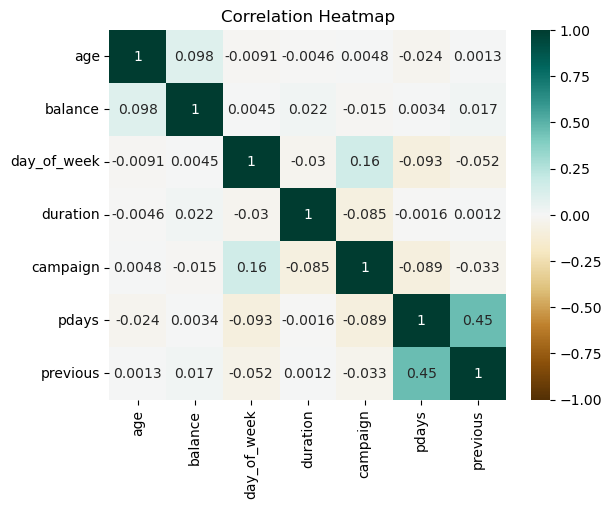

In [6]:
numeric_cols = df.select_dtypes("number").columns
sns.heatmap(df[numeric_cols].corr(), vmin=-1, vmax=1, annot = True, cmap = 'BrBG').set_title('Correlation Heatmap')

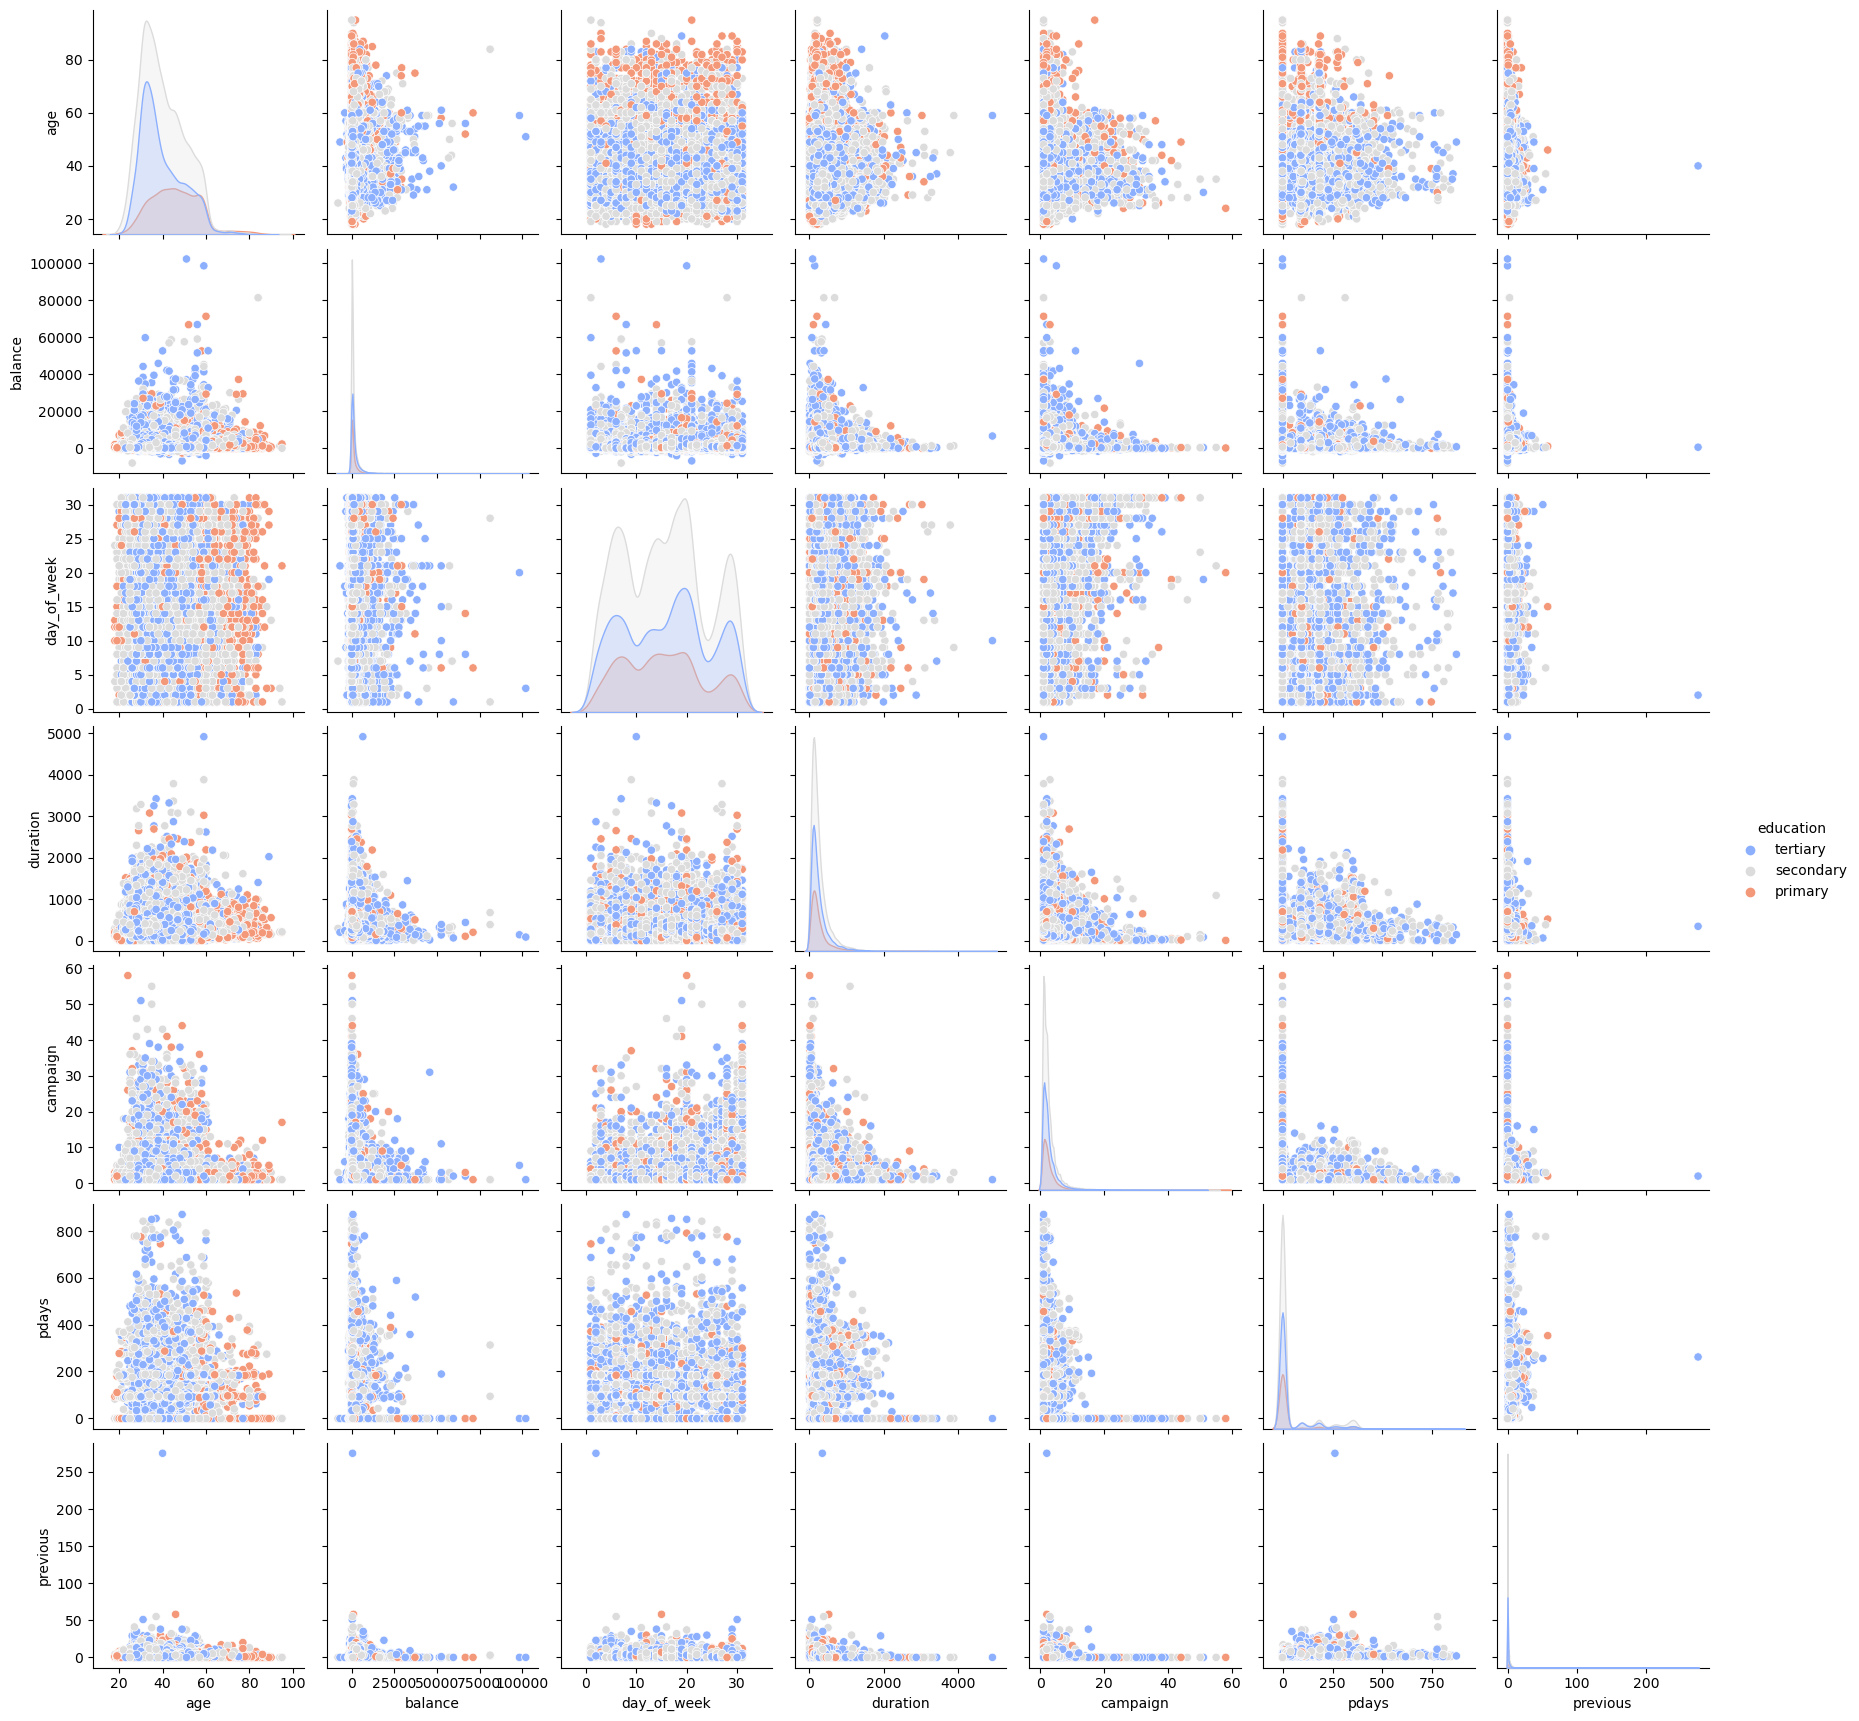

In [7]:
sns.pairplot(df, hue = 'education', palette = 'coolwarm')

There are some notable cases in these outlier-holding variables. Mainly, 'previous' seems to have only one outlier. Let's stop working with 'age' and 'days of week' and have a closer look.

In [8]:
outlier_df = df[numeric_cols].drop(['age', 'day_of_week'], axis = 1)

<Axes: xlabel='previous', ylabel='Count'>

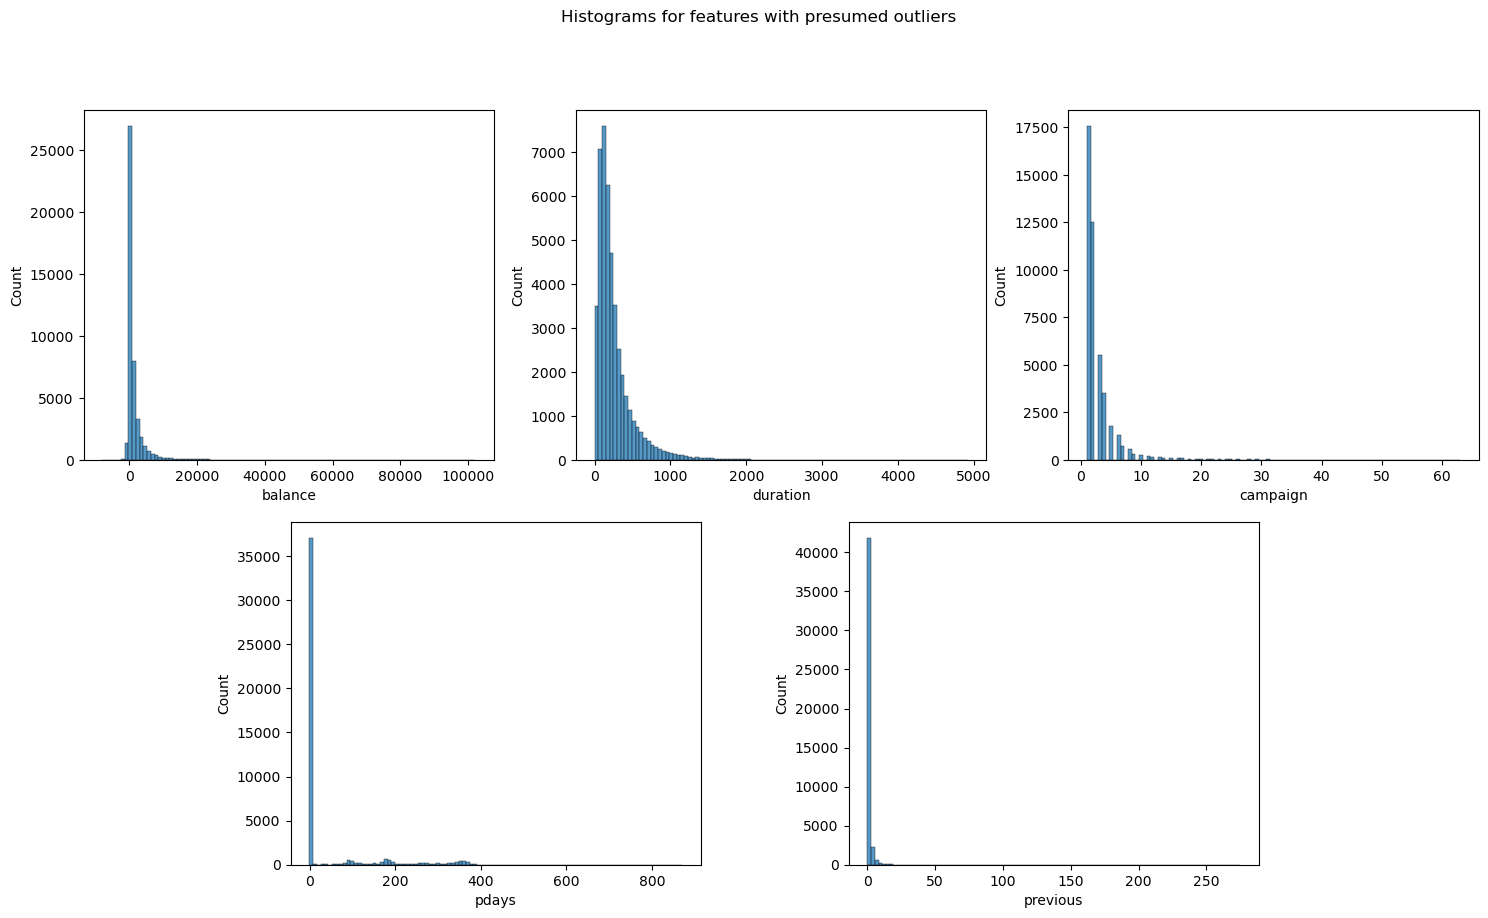

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Histograms for features with presumed outliers')

axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

sns.histplot(ax=axes[0, 0], data = outlier_df, x = 'balance', bins = 100)
sns.histplot(ax=axes[0, 1], data = outlier_df, x = 'duration', bins = 100)
sns.histplot(ax=axes[0, 2], data = outlier_df, x = 'campaign', bins = 100)
sns.histplot(ax=axes[1, 0], data = outlier_df, x = 'pdays', bins = 100)
sns.histplot(ax=axes[1, 1], data = outlier_df, x = 'previous', bins = 100)

<Axes: ylabel='previous'>

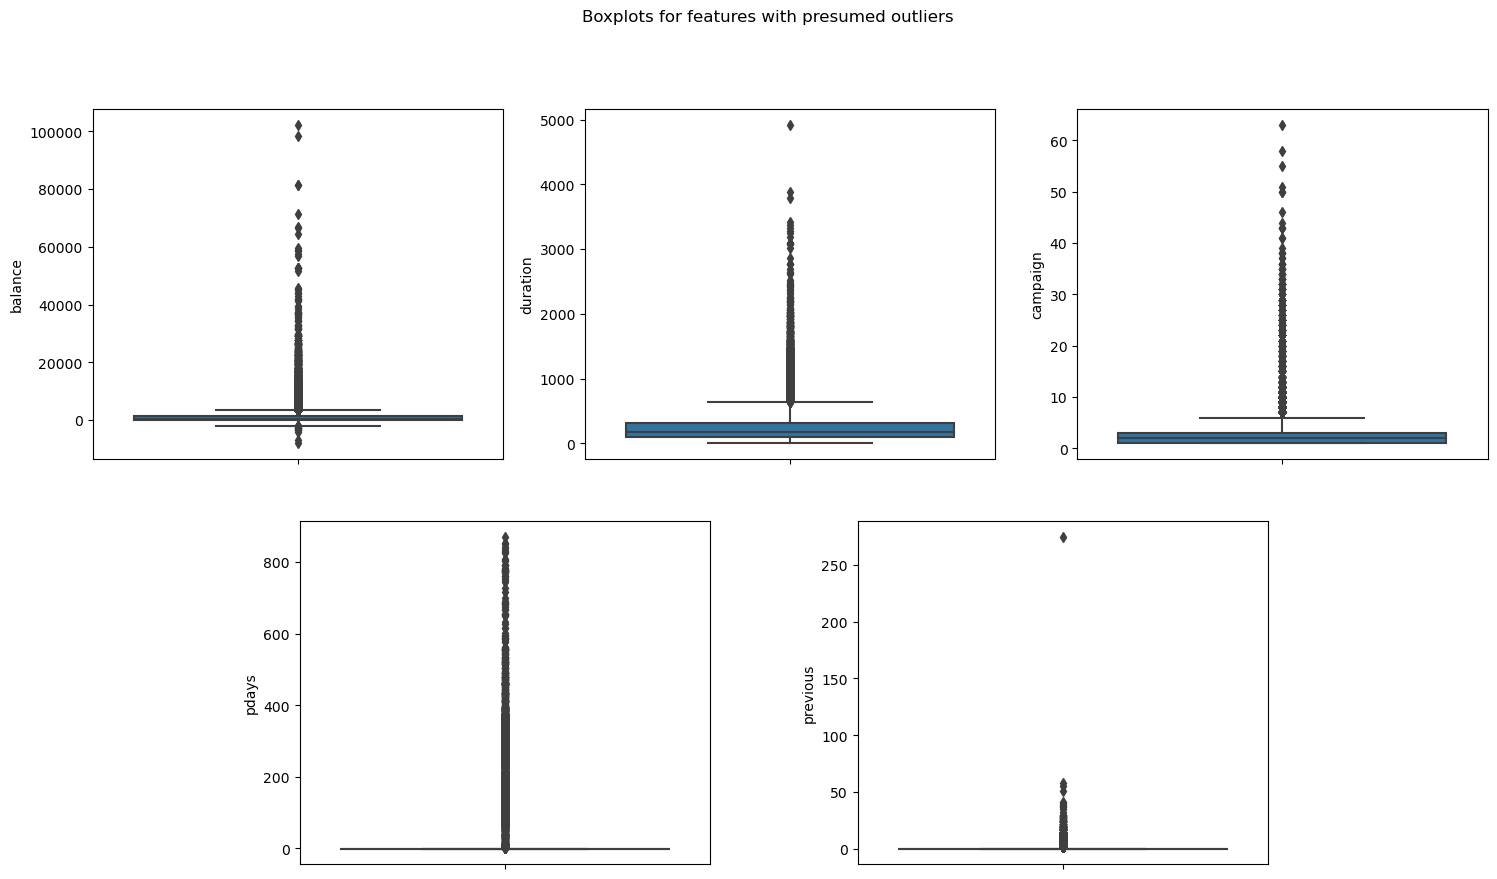

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots for features with presumed outliers')

axes[1][2].set_visible(False)
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])

sns.boxplot(ax=axes[0, 0], data = outlier_df, y = 'balance')
sns.boxplot(ax=axes[0, 1], data = outlier_df, y = 'duration')
sns.boxplot(ax=axes[0, 2], data = outlier_df, y = 'campaign')
sns.boxplot(ax=axes[1, 0], data = outlier_df, y = 'pdays')
sns.boxplot(ax=axes[1, 1], data = outlier_df, y = 'previous')

Although the boxplot (and our initial analysis) indicate a wide range of values outside the interquartile range, it might not mean much if these variables are not normally distributed (as we have seen from the histograms and kde's). We can proceed to manually get rid of the observations with the farthest values manually, placing a 'cap' on our features.

In [11]:
df2 = df[(df["balance"] < 80000) & (df["duration"] < 3500) & (df["campaign"] < 50) & (df["previous"] < 50)] #saving as separate dataframe to use the original for further analysis
df2.describe() 


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000
mean,40.933929,1354.267956,15.806080,257.889742,2.757136,40.167744,0.570717
std,10.615054,2925.187106,8.321926,255.484347,3.040134,100.055726,1.856456
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,71188.000000,31.000000,3422.000000,46.000000,871.000000,41.000000


Although this is our first solution, we will later use WoE transformation to better deal with both outliers and missing values. Now, let's check for missing values with the following code, as well as a heatmap to visualize it better.

In [12]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

<Axes: >

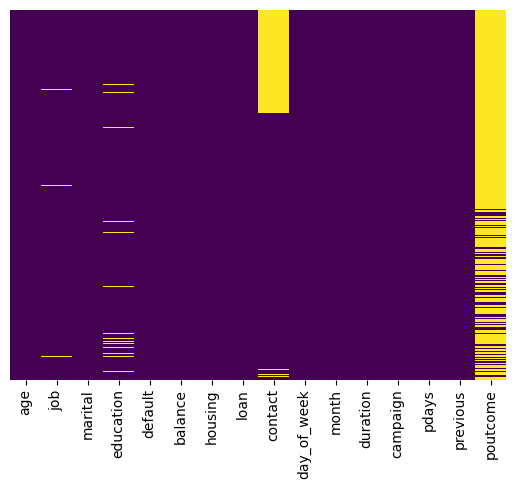

In [13]:
sns.heatmap(df.drop('y', axis = 1).isnull(),yticklabels=False,cbar=False,cmap='viridis')

Before we jump to WoE, we will first try to impute the missing values using certain rules and the mode (we will call this df2), and we will also remove records with missing values (and this one df3) and keep it as alternative datasets we can try for modeling later on. 'poutcome' and 'contact' might have too many missing values to keep around, but we might be able to impute the ones in 'job' and 'education'.

In [14]:
print(df2['job'].value_counts())
print(df2['education'].value_counts())

job
blue-collar      9729
management       9451
technician       7593
admin.           5171
services         4153
retired          2262
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
education
secondary    23194
tertiary     13295
primary       6849
Name: count, dtype: int64


Text(0.5, 0, 'job')

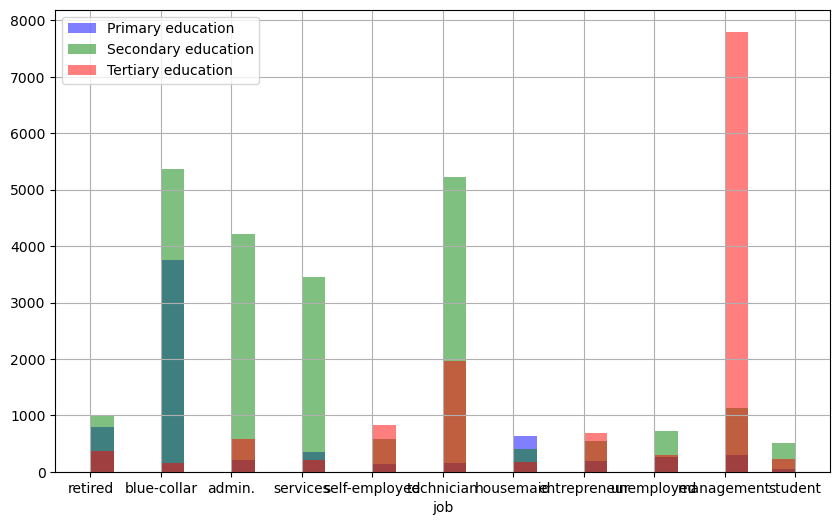

In [15]:
plt.figure(figsize=(10,6))
df[df['education']=='primary']['job'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Primary education')
df[df['education']=='secondary']['job'].hist(alpha=0.5,color='green',
                                              bins=30,label='Secondary education')
df[df['education']=='tertiary']['job'].hist(alpha=0.5,color='red',
                                              bins=30,label='Tertiary education')
plt.legend()
plt.xlabel('job')

The amount of people with tertiary education in management is overwhelming! We might be able to leverage this instead of simply replacing all values with the mode. The same goes for the proportion with primary education in housemaid.

In [16]:
def education_filler(row):
    if row['job'] == 'management':
        return 'tertiary'
    elif row['job'] == 'housemaid':
        return 'primary'
    else:
        return 'secondary' # mode replacement. secondary education is the most common value.

df2['education'][df2['education'].isnull() == True] = df2.apply(education_filler, axis = 1)

C:\Users\ianpv\AppData\Local\Temp\ipykernel_57576\838612309.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['education'][df2['education'].isnull() == True] = df2.apply(education_filler, axis = 1)


<Axes: xlabel='age', ylabel='Density'>

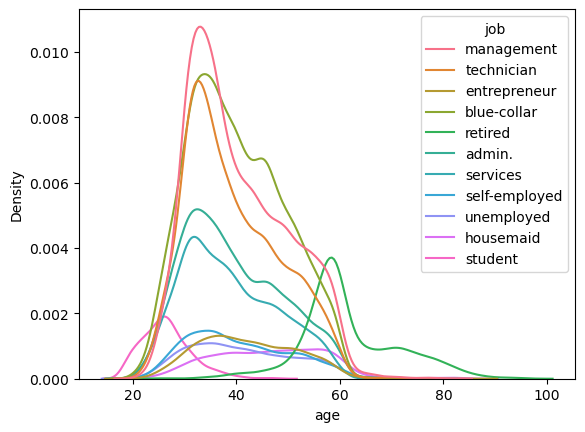

In [17]:
sns.kdeplot(df2, x = 'age', hue = 'job')

Similarly, we might be able to derive some conclusions about our missing values on 'job' from the age of our subjects. People below 22 years old tend to be students, while people over 60 tend to be retired by a large margin.

In [18]:
def job_filler(row):
    if row['age'] <= 22:
        return 'student'
    elif row['age'] >= 60:
        return 'retired'
    else:
        return 'blue-collar' # mode replacement.

df2['job'][df2['job'].isnull() == True] = df2.apply(job_filler, axis = 1)

C:\Users\ianpv\AppData\Local\Temp\ipykernel_57576\4068147526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['job'][df2['job'].isnull() == True] = df2.apply(job_filler, axis = 1)


Let's check our heatmap now.

<Axes: >

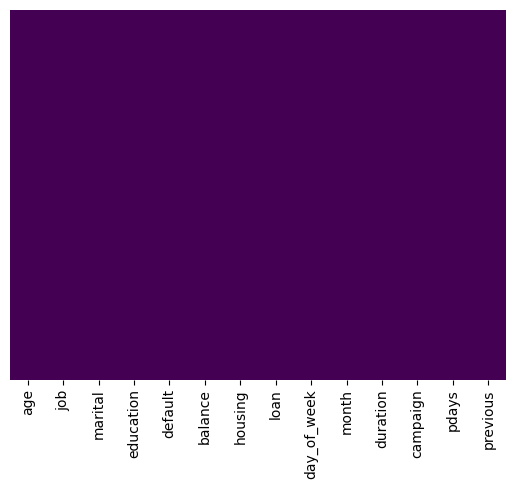

In [19]:
sns.heatmap(df2.drop(['y', 'contact', 'poutcome'], axis = 1).isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have imputed all missing values based on our conditions. Let's try the next approach of deleting all these instances where missing values on 'age' and 'job' exist.

In [20]:
df3 = df.drop(['contact', 'poutcome'], axis = 1).dropna()
len(df) - len(df3)

2018

<Axes: >

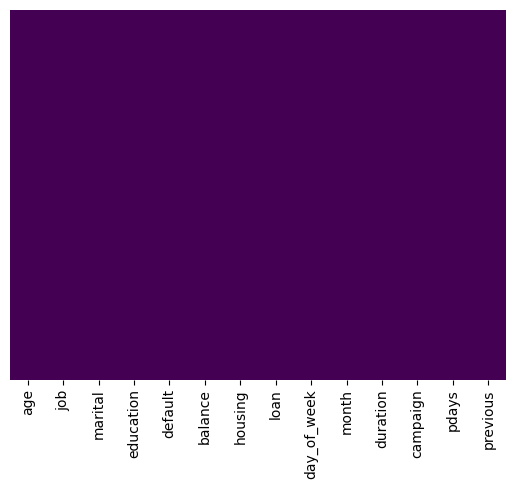

In [21]:
sns.heatmap(df3.drop(['y'], axis = 1).isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have once again successfully dealt with all missing  values, with the downside of losing 2,018 observations. This may not be too taxing on our final product considering our sample size. Now, let's get started with our final Weight of Evidence transformation.

In [22]:
df['y'].replace(['no', 'yes'],[0, 1], inplace=True) # convert categorical target to numeric

In [23]:
import category_encoders as ce

X_cols = df.drop('y', axis = 1).columns
# Create a WOE encoder
encoder = ce.WOEEncoder(cols = X_cols)

# Fit the encoder on the data
encoder.fit(df[X_cols], df['y'])

# Transform the data using the encoder
df_woe = encoder.transform(df[X_cols])

# Print the WOE and IV for each feature
df_woe.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,-0.056668,-0.053977,-0.014830,-0.018675,-0.002581,0.262057,-0.072978,-0.023272,-0.135749,-0.039643,-0.125523,-0.484749,-0.025784,-0.099244,-0.073941,-0.108961
std,0.392563,0.375508,0.195783,0.221915,0.087355,0.756433,0.435625,0.257951,0.637470,0.340003,0.556473,1.282815,0.305510,0.568378,0.428904,0.536174
min,-0.454762,-0.522928,-0.162288,-0.337618,-0.647305,-1.910855,-0.462385,-0.613807,-1.137031,-0.566855,-0.608632,-3.097023,-1.930273,-1.589948,-0.618087,-0.272837
25%,-0.242487,-0.310291,-0.162288,-0.115224,0.009254,-0.330405,-0.462385,0.089401,-1.137031,-0.278219,-0.608632,-1.325419,-0.048731,-0.273338,-0.273338,-0.272837
50%,-0.143334,-0.062920,-0.162288,-0.115224,0.009254,0.175144,-0.462385,0.089401,0.280183,-0.039779,-0.157375,-0.416534,-0.048525,-0.273338,-0.273338,-0.272837
75%,-0.062036,0.185873,0.282809,0.287283,0.009254,0.721687,0.414338,0.089401,0.280183,0.208268,-0.067142,0.316222,0.254776,-0.273338,-0.273338,-0.272837
max,3.119583,1.112115,0.282809,0.287283,0.009254,3.812730,0.414338,0.089401,0.280183,1.080791,2.100344,3.812730,0.922358,3.407265,2.020970,2.627106


In [24]:
# RFC Model to impute missing values on 'job', which was discarded because of its low predictive power

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

df_tree_job = df.drop(['contact', 'poutcome', 'duration', 'y'], axis = 1)
cat_feats = ['default', 'education', 'marital', 'housing', 'loan', 'month']
df_tree_job = pd.get_dummies(df_tree_job, columns = cat_feats, drop_first = True)
df_tree_job = df_tree_job.loc[df['job'].isnull() == False]

X = df_tree_job.drop('job', axis = 1)
y = df_tree_job['job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
predictions_val = forest.predict(X_val)
print(classification_report(y_val, predictions_val))
print(confusion_matrix(y_val, predictions_val))

               precision    recall  f1-score   support

       admin.       0.23      0.20      0.21      1025
  blue-collar       0.44      0.63      0.52      1993
 entrepreneur       0.06      0.01      0.02       313
    housemaid       0.12      0.05      0.07       250
   management       0.56      0.76      0.65      1849
      retired       0.58      0.57      0.57       476
self-employed       0.05      0.01      0.01       349
     services       0.17      0.12      0.14       811
      student       0.48      0.39      0.43       195
   technician       0.31      0.27      0.29      1450
   unemployed       0.08      0.02      0.03       274

     accuracy                           0.41      8985
    macro avg       0.28      0.27      0.27      8985
 weighted avg       0.36      0.41      0.37      8985

[[ 203  312    5   10  120   32    8  110   14  199   12]
 [ 193 1254   12   27   68   38    4  152   18  217   10]
 [  17   94    3    5  130    9    2   11    1   39    2

### Some more EDA

**Might be more interesting for stakeholders, as well as setting the basis for our EDA presentation.*

We will mainly be visualizing our explanatory variables in relation to our target variable 'subscription' (our 'y', or more specifically,whether or not the person subscribed to the term deposit or not). 

Our data seems to be highly imbalanced, with only about 12% of people subscribing to the term deposit.

Text(0.5, 1.0, 'Amount of people by whether or not they subscribed to term deposit')

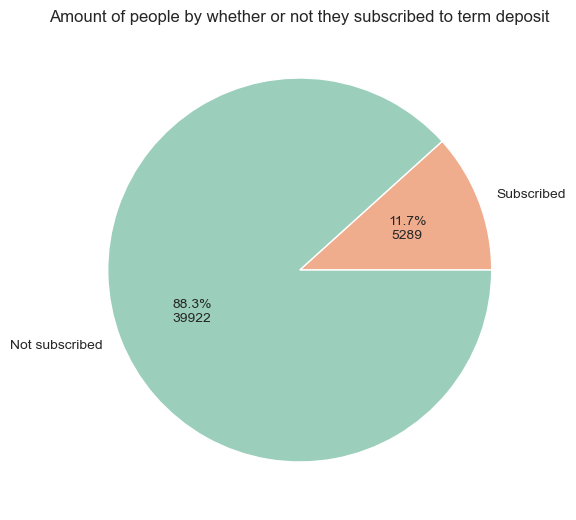

In [84]:
y_yes = df['y'][df['y'] == 1].count()  
y_no = df['y'][df['y'] == 0].count()

def my_fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, df['y'].count()*x/100)

sns.set_style('white')
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.pie([y_yes, y_no], labels = ['Subscribed', 'Not subscribed'], colors = ['#F0AD8E', "#9BCFBC"], autopct = my_fmt)
ax.set_title("Amount of people by whether or not they subscribed to term deposit")

With the bulk of the people in our data being between 25 and 59 years of age, it is worth noting the proportion of people that subscribed is considerably higher for older people (about 50% on the last two bins), although it is not very noticeable because the total amount of those people in our data is very low in comparison to younger adults.

Text(0.5, 1.0, 'Histogram of age by subscription')

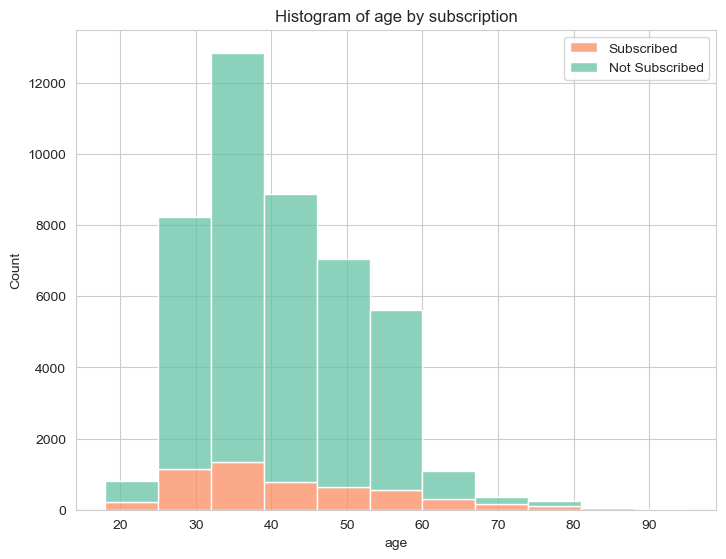

In [87]:
sns.set_style('whitegrid')
sns.diverging_palette(220, 20, as_cmap=True)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.histplot(df, x = 'age', hue = 'y', palette = 'Set2', bins = 11, multiple = 'stack')
ax.legend(labels = ['Subscribed', 'Not Subscribed'])
ax.set_title("Histogram of age by subscription")

In [137]:
a = df.groupby('day_of_week').apply(lambda x: x.count())['y']

In [138]:
b = df[df['y'] == 1].groupby('day_of_week').apply(lambda x: x.count())['y']

In [146]:
c = b/a
c

day_of_week
1     0.279503
2     0.140758
3     0.164968
4     0.159170
5     0.112565
6     0.093685
7     0.086406
8     0.109121
9     0.114670
10    0.230916
11    0.122380
12    0.152215
13    0.152050
14    0.113636
15    0.139753
16    0.135689
17    0.090768
18    0.098787
19    0.069437
20    0.069767
21    0.099210
22    0.170166
23    0.134185
24    0.138702
25    0.158333
26    0.112077
27    0.133809
28    0.078142
29    0.073926
30    0.173052
31    0.071540
Name: y, dtype: float64

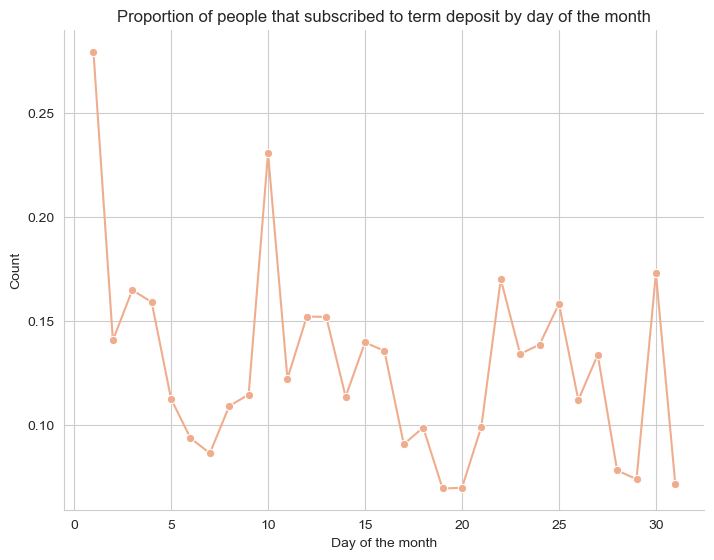

In [156]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
sns.lineplot(c, color = '#F0AD8E', marker = 'o')
ax.set_ylabel("Count")
ax.set_xlabel('Day of the month')
ax.set_title("Proportion of people that subscribed to term deposit by day of the month")
sns.despine()